In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread("image.jpg")
#converts the image into grey-scale
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#converts the image from brg to rgb
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

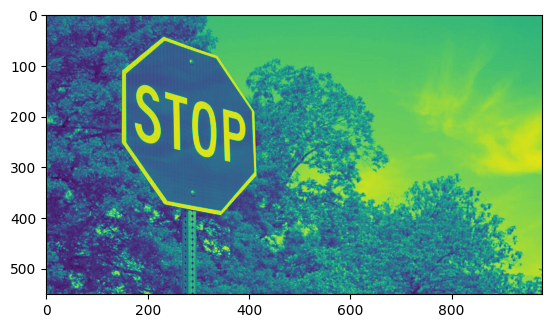

In [ ]:
plt.subplot(1,1,1)
plt.imshow(img_gray)
plt.show()

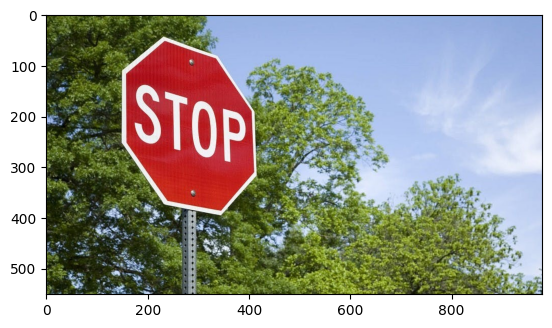

In [ ]:
# Creates the environment and displaying the picture
plt.subplot(1,1,1)#to change the size of the image (x,y,z) axis. The z-axis must always be 1 since its a 2D image.
plt.imshow(img_rgb)
plt.show()

In [ ]:
#stop_data is used to find stop signs.
#img_scale, detectmultiScale is used to detect objects in greyscale.
#minSize(), used to ignore objects size less than 20.
stop_data = cv2.CascadeClassifier('/content/stop_data.xml')
found = stop_data.detectMultiScale(img_gray, minSize=(20,20))

In [ ]:
#calculates the number of stop signs in the pic
amount_found=len(found)
#checks if stop signs are detected. If there are no stop signs, if block will not be excecuted
if amount_found != 0:
  #w=width,h=height; (x,y,h,w)the coordinates of each detected object.
  for(x,y,w,h) in found:
     #(0, 255, 0) specifies the color of the rectangle in the BGR format (green in this case), and 5 is the thickness of the rectangle border.
     cv2.rectangle(img_rgb,(x,y),(x+h,y+w),(0,255,0),25)

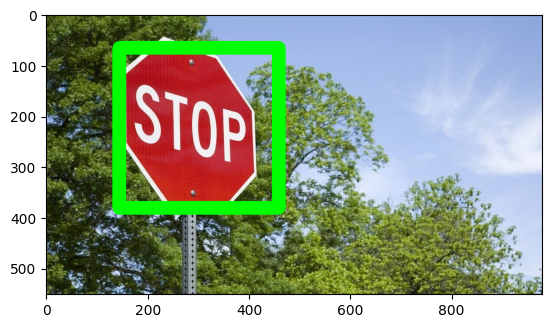

In [ ]:
plt.subplot(1,1,1)
plt.imshow(img_rgb)
plt.show()

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install tesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


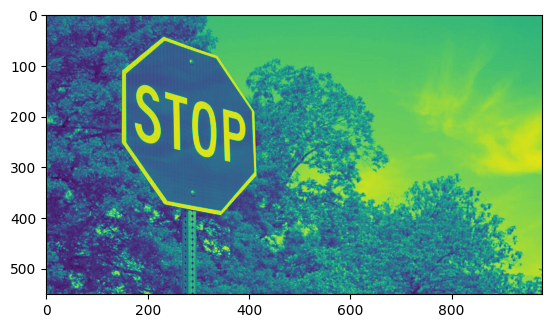

In [ ]:
#Noise Removal
noise=cv2.medianBlur(img_gray,1)
plt.subplot(1,1,1)
plt.imshow(noise)
plt.show()

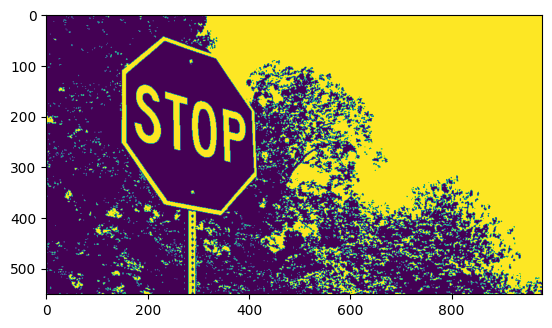

In [ ]:
# Used to convert the image to binary image, segmentation, pixels btw 0 to 255
thresh = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# 0 --> Threshold value which also indicates black. 255 --> maximum value(pixels) which also indicates white
#THRESH_BINARY --> thresholding method that sets the pixel values below the threshold to 0 and the values above the threshold to the maximum value (255).
# THRESH_OTSU --> threshold that separates the foreground and background well.
# [1] -->
plt.subplot(1,1,1)
plt.imshow(thresh)
plt.show()

In [ ]:
# Define the kernel
kernel = np.ones((3, 3), np.uint8)
#To increse the object area
dil = cv2.dilate(thresh, kernel, iterations=5)

In [ ]:
eros= cv2.erode(dil,kernel,iterations=5)

In [ ]:
open_eros=cv2.morphologyEx(eros, cv2.MORPH_OPEN, kernel)

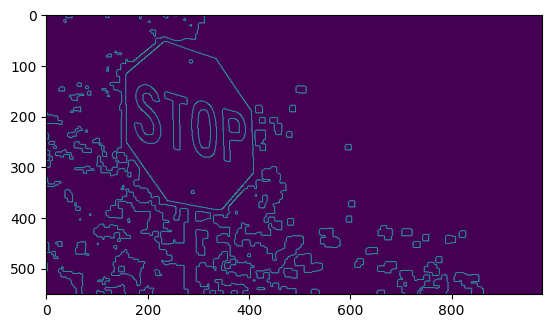

In [ ]:
canny=cv2.Canny(open_eros,400,200)
plt.subplot(1,1,1)
plt.imshow(canny)
plt.show()

In [ ]:
center = (w // 2, h // 2)
matrix=cv2.getRotationMatrix2D(center,-1,1.0)
rotated=cv2.warpAffine(canny,matrix,(h,w))

TypeError: ignored